In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from functools import wraps
from typing import Any, Dict, List, Tuple

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


from id3_sklearn import GiniRunner, EntropyRunner, TreeBaseRunner

<IPython.core.display.Javascript object>

# Create categorical data

In [3]:
np.random.seed(42)
N = 150

CAT_FEATURE_1 = np.random.choice([0, 1, 2], p=[0.3, 0.3, 0.4], size=(N,))
CAT_FEATURE_2 = np.random.choice([10, 20, 30], p=[0.3, 0.6, 0.1], size=(N,))

TARGET = np.random.choice([0, 1], p=[0.5, 0.5], size=(N,))

original_df = pd.DataFrame(
    data={"feature_1": CAT_FEATURE_1, "feature_2": CAT_FEATURE_2, "label": TARGET}
)

df = pd.DataFrame()
for feature in ["feature_1", "feature_2"]:
    df = pd.concat(
        [pd.get_dummies(original_df[feature]).add_prefix(f"{feature}_"), df], axis=1
    )

df["label"] = original_df["label"]

df

,feature_2_10,feature_2_20,feature_2_30,feature_1_0,feature_1_1,feature_1_2,label
0,0,0,1,0,1,0,0
1,1,0,0,0,0,1,1
2,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1
4,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...
145,0,1,0,1,0,0,1
146,0,1,0,0,0,1,1
147,1,0,0,0,1,0,1
148,0,1,0,1,0,0,0


<IPython.core.display.Javascript object>

In [4]:
X = df.drop(["label"], axis=1)
y = df["label"]

<IPython.core.display.Javascript object>

In [5]:
clf = DecisionTreeClassifier(splitter="best", criterion="entropy", random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

<IPython.core.display.Javascript object>

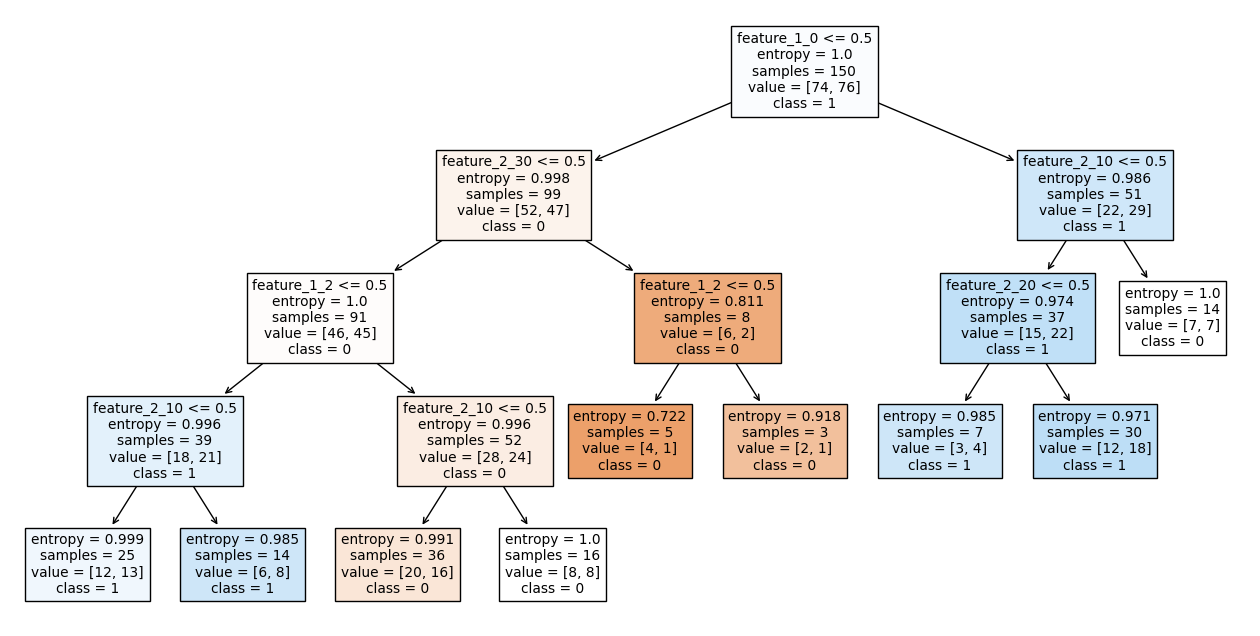

<IPython.core.display.Javascript object>

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True)

# Run

In [7]:
IMPURITY_RUNNER = EntropyRunner()

<IPython.core.display.Javascript object>

In [8]:
def iteration(x, y, impurity_runner=IMPURITY_RUNNER):
    tree_runner = TreeBaseRunner(x, y, impurity_runner=IMPURITY_RUNNER)
    best_feature_to_split_on, best_label_to_split_on = tree_runner.get_splits()

    split_good, split_bad = tree_runner.run()

    return split_good, split_bad

<IPython.core.display.Javascript object>

In [9]:
# Follow path with the lower gini impurity at each split

split_good, split_bad = iteration(X, y)
for i in range(4):
    split_good, split_bad = iteration(*split_good)

impurity: 0.999871756640849
samples: 150
value: Counter({1: 76, 0: 74})
best_feature_to_split_on: feature_1_0, best_feature_label_to_split_on: 1


impurity: 0.9863676072907088
samples: 51
value: Counter({1: 29, 0: 22})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0


impurity: 0.9740248644357521
samples: 37
value: Counter({1: 22, 0: 15})
best_feature_to_split_on: feature_2_20, best_feature_label_to_split_on: 1


impurity: 0.9709505944546686
samples: 30
value: Counter({1: 18, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0


impurity: 0.9709505944546686
samples: 30
value: Counter({1: 18, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0




<IPython.core.display.Javascript object>

In [10]:
# follow path with the highest impurity at each split

split_good, split_bad = iteration(X, y)
for i in range(4):
    split_good, split_bad = iteration(*split_bad)

impurity: 0.999871756640849
samples: 150
value: Counter({1: 76, 0: 74})
best_feature_to_split_on: feature_1_0, best_feature_label_to_split_on: 1


impurity: 0.9981592324817737
samples: 99
value: Counter({0: 52, 1: 47})
best_feature_to_split_on: feature_2_30, best_feature_label_to_split_on: 1


impurity: 0.9999128895013562
samples: 91
value: Counter({0: 46, 1: 45})
best_feature_to_split_on: feature_1_1, best_feature_label_to_split_on: 0


impurity: 0.9957274520849255
samples: 39
value: Counter({1: 21, 0: 18})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 1


impurity: 0.9988455359952018
samples: 25
value: Counter({1: 13, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0




<IPython.core.display.Javascript object>